# CHW03_Q3_99106352

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.metrics import pairwise_distances_argmin_min, pairwise_distances
from deap import base, creator, tools, algorithms

## Load Data

In [2]:
# Load .mat file
mat_data = scipy.io.loadmat('DataNew.mat')

In [3]:
data = mat_data['DataNew'].T
print(data.shape)

(1000, 2)


## Plot Data

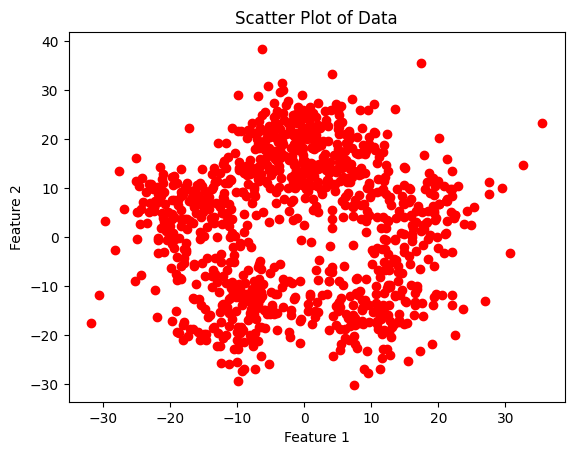

In [4]:
plt.scatter(data[:,1],data[:,0], color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data')
plt.show()

# A

/Users/parniantaheri/anaconda3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/parniantaheri/anaconda3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	88    
2  	94    
3  	92    
4  	90    
5  	93    
6  	90    
7  	91    
8  	86    
9  	92    
10 	84    
11 	91    
12 	93    
13 	94    
14 	88    
15 	91    
16 	94    
17 	96    
18 	90    
19 	84    
20 	89    
21 	93    
22 	94    
23 	90    
24 	91    
25 	91    
26 	92    
27 	92    
28 	91    
29 	85    
30 	87    
31 	85    
32 	86    
33 	89    
34 	91    
35 	91    
36 	88    
37 	86    
38 	92    
39 	91    
40 	89    
41 	88    
42 	91    
43 	91    
44 	91    
45 	89    
46 	85    
47 	90    
48 	89    
49 	89    
50 	90    
51 	91    
52 	89    
53 	88    
54 	87    
55 	90    
56 	89    
57 	92    
58 	94    
59 	90    
60 	96    
61 	94    
62 	93    
63 	93    
64 	92    
65 	90    
66 	88    
67 	92    
68 	89    
69 	85    
70 	86    
71 	92    
72 	88    
73 	90    
74 	87    
75 	83    
76 	94    
77 	89    
78 	92    
79 	92    
80 	93    
81 	88    
82 	90    
83 	91    
84 	89    
85 	94    
86 	88    
87 	94    
88 	90    
89 	91    

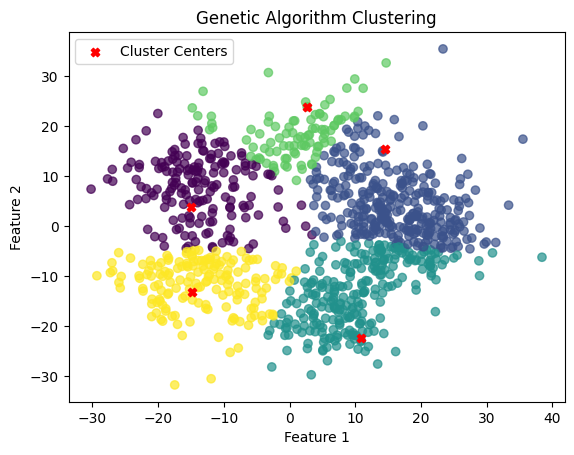

In [6]:
def fitness_function(individual):
    centroids = np.array(individual).reshape((NUM_CLUSTERS, 2))

    # Assign labels to each data
    centroids_labels = np.argmin(pairwise_distances(data, centroids), axis=1)
    
    # Calculate intra_ and inter_cluster distance
    intra_cluster_distance = sum([np.mean(pairwise_distances(data[centroids_labels == i])) for i in range(NUM_CLUSTERS) if len(data[centroids_labels == i])>0])
    inter_cluster_distance = np.sum(pairwise_distances(centroids))
    
    return (inter_cluster_distance - intra_cluster_distance),  # Return a tuple, as DEAP expects a tuple



# Constants
NUM_CLUSTERS = 5  # Number of clusters
POP_SIZE = 50  # Population size
GEN_COUNT = 200  # Number of generations

# Define individual and population
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

# Initialize individuals and population
toolbox = base.Toolbox()
toolbox.register("individual", tools.initRepeat, creator.Individual, np.random.uniform, n=NUM_CLUSTERS * 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


toolbox.register("evaluate", fitness_function)

# Genetic Algorithm Parameters

# Crossover and mutation probabilities
CXPB, MUTPB = 0.7, 0.2  

# Register genetic operators in the toolbox
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create population and evolve
pop = toolbox.population(n=POP_SIZE)
algorithms.eaMuPlusLambda(pop, toolbox, mu=POP_SIZE, lambda_=2*POP_SIZE, cxpb=CXPB, mutpb=MUTPB, ngen=GEN_COUNT, stats=None, halloffame=None, verbose=True)

# Get the best solution
best_solution = tools.selBest(pop, k=1)[0]

# Extract cluster assignments from the best solution for all labels
best_centroids = np.array(best_solution).reshape((NUM_CLUSTERS, 2))

# Perform clustering based on the best solution
labels, _ = pairwise_distances_argmin_min(data, best_centroids)

# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='X', label='Cluster Centers')
plt.title('Genetic Algorithm Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# B

/Users/parniantaheri/anaconda3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/parniantaheri/anaconda3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	50    
1  	85    
2  	93    
3  	88    
4  	92    
5  	91    
6  	88    
7  	88    
8  	93    
9  	89    
10 	92    
11 	90    
12 	93    
13 	93    
14 	91    
15 	87    
16 	91    
17 	89    
18 	84    
19 	88    
20 	86    
21 	92    
22 	92    
23 	95    
24 	88    
25 	89    
26 	95    
27 	92    
28 	83    
29 	86    
30 	92    
31 	94    
32 	86    
33 	86    
34 	89    
35 	82    
36 	86    
37 	84    
38 	92    
39 	91    
40 	87    
41 	92    
42 	90    
43 	86    
44 	92    
45 	89    
46 	90    
47 	95    
48 	92    
49 	90    
50 	90    
51 	89    
52 	87    
53 	90    
54 	91    
55 	92    
56 	93    
57 	88    
58 	90    
59 	90    
60 	88    
61 	87    
62 	90    
63 	93    
64 	90    
65 	92    
66 	87    
67 	88    
68 	89    
69 	86    
70 	87    
71 	92    
72 	92    
73 	84    
74 	87    
75 	90    
76 	93    
77 	89    
78 	93    
79 	91    
80 	94    
81 	89    
82 	91    
83 	92    
84 	89    
85 	88    
86 	88    
87 	95    
88 	91    
89 	92    

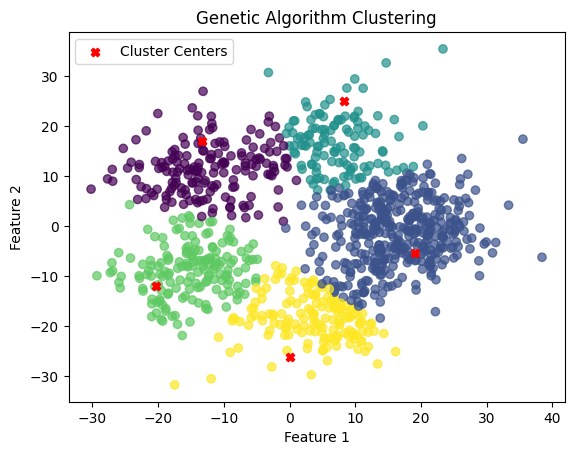

In [7]:
def fitness_function(individual):
    centroids = np.array(individual).reshape((NUM_CLUSTERS, 2))
    
    # Assign labels to each data
    centroids_labels = np.argmin(pairwise_distances(data, centroids), axis=1)

    # Check if there are exactly 5 clusters    
    unique_labels = np.unique(centroids_labels)
    if len(unique_labels) < NUM_CLUSTERS:
        # Select a labels not in the current set
        new_label = ([label for label in range(NUM_CLUSTERS) if label not in unique_labels])
        
        for i in range(len(new_label)):
            # Find the label with the maximum number of assigned data points
            max_label = np.argmax(np.bincount(centroids_labels))

            # Find the data points assigned to the centroid with the maximum label
            max_label_data_points = np.where(centroids_labels == max_label)[0]

            # Randomly choose a subset of data points with the maximum label
            num_to_replace = np.random.randint(40, 101)

            # Get data points which are going to be replaced
            replace_indices = np.random.choice(max_label_data_points, size=num_to_replace, replace=False)

            # Assign the new label to the selected data points
            centroids_labels[replace_indices] = new_label[i]
            
    # Calculate intra_ and inter_cluster distance
    intra_cluster_distance = sum([np.mean(pairwise_distances(data[centroids_labels == i])) for i in range(NUM_CLUSTERS)])
    inter_cluster_distance = np.sum(pairwise_distances(centroids))
    
    return (inter_cluster_distance - intra_cluster_distance),  # Return a tuple, as DEAP expects a tuple



# Constants
NUM_CLUSTERS = 5  # Number of clusters
POP_SIZE = 50  # Population size
GEN_COUNT = 200  # Number of generations

# Define individual and population
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

# Initialize individuals and population
toolbox = base.Toolbox()
toolbox.register("individual", tools.initRepeat, creator.Individual, np.random.uniform, n=NUM_CLUSTERS * 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


toolbox.register("evaluate", fitness_function)

# Genetic Algorithm Parameters

# Crossover and mutation probabilities
CXPB, MUTPB = 0.7, 0.2  

# Register genetic operators in the toolbox
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create population and evolve
pop = toolbox.population(n=POP_SIZE)
algorithms.eaMuPlusLambda(pop, toolbox, mu=POP_SIZE, lambda_=2*POP_SIZE, cxpb=CXPB, mutpb=MUTPB, ngen=GEN_COUNT, stats=None, halloffame=None, verbose=True)

# Get the best solution
best_solution = tools.selBest(pop, k=1)[0]

# Extract cluster assignments from the best solution for all labels
best_centroids = np.array(best_solution).reshape((NUM_CLUSTERS, 2))

# Perform clustering based on the best solution
labels, _ = pairwise_distances_argmin_min(data, best_centroids)

# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='X', label='Cluster Centers')
plt.title('Genetic Algorithm Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# C

Generation: 100, Fitness: 34.63122839067293
Generation: 200, Fitness: 34.08515886646088
Generation: 300, Fitness: 25.784535871225277
Generation: 400, Fitness: 23.67371590831105
Generation: 500, Fitness: 23.401354478519888
Generation: 600, Fitness: 19.278929872390812
Generation: 700, Fitness: 16.763597318994947
Generation: 800, Fitness: 15.787508995978687
Generation: 900, Fitness: 15.178780333617556
Generation: 1000, Fitness: 15.117084895933534
Generation: 1100, Fitness: 14.761031277660464
Generation: 1200, Fitness: 14.692370541169687
Generation: 1300, Fitness: 14.605666025480392
Generation: 1400, Fitness: 14.584989849094303
Generation: 1500, Fitness: 14.649014902048503
Generation: 1600, Fitness: 14.578186206778948
Generation: 1700, Fitness: 14.577040557134996
Generation: 1800, Fitness: 14.57460331761538
Generation: 1900, Fitness: 14.573556247391018
Generation: 2000, Fitness: 14.573323899004777
Generation: 2100, Fitness: 14.57245498550946
Generation: 2200, Fitness: 14.57153087831933
Gen

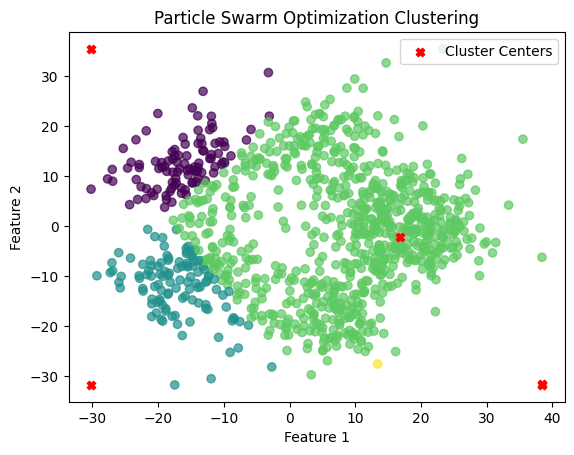

In [12]:
from pyswarm import pso

# Constants
NUM_CLUSTERS = 5  # Number of clusters
POP_SIZE = 50  # Population size
GEN_COUNT = 100  # Number of generations
generation_counter = 0

def pso_fitness_function(position):
    global generation_counter

    centroids = position.reshape((NUM_CLUSTERS, 2))
    centroids_labels = np.argmin(pairwise_distances(data, centroids), axis=1)

    intra_cluster_distance = sum([np.mean(pairwise_distances(data[centroids_labels == i])) for i in range(NUM_CLUSTERS) if len(data[centroids_labels == i])>0])
    inter_cluster_distance = np.sum(pairwise_distances(centroids))
    
    fitness = intra_cluster_distance - 0.02*inter_cluster_distance
    
    generation_counter += 1
    if generation_counter % 100 == 0:
        print(f"Generation: {generation_counter}, Fitness: {fitness}")
    return  fitness



# PSO optimization
lb = np.tile(np.min(data, axis=0), NUM_CLUSTERS)
ub = np.tile(np.max(data, axis=0), NUM_CLUSTERS)


best_solution, _ = pso(pso_fitness_function, lb, ub, swarmsize=POP_SIZE, maxiter=GEN_COUNT)

# Extract cluster assignments from the best solution for all labels
best_centroids = best_solution.reshape((NUM_CLUSTERS, 2))
best_labels, _ = pairwise_distances_argmin_min(data, best_centroids)

# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='viridis', alpha=0.7)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='X', label='Cluster Centers')
plt.title('Particle Swarm Optimization Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# D

Generation: 100, Fitness: 10075.344367123293
Generation: 200, Fitness: 10079.984922848516
Generation: 300, Fitness: 54.23287430234741
Generation: 400, Fitness: 10069.616920255297
Generation: 500, Fitness: 51.83519388965327
Generation: 600, Fitness: 51.02752253585592
Generation: 700, Fitness: 48.47949692881272
Generation: 800, Fitness: 48.439409308169544
Generation: 900, Fitness: 48.13904099427329
Generation: 1000, Fitness: 47.85424112498145
Generation: 1100, Fitness: 47.86079395506377
Generation: 1200, Fitness: 47.73477236916823
Generation: 1300, Fitness: 47.70943167457685
Generation: 1400, Fitness: 47.64669339643636
Generation: 1500, Fitness: 47.637068357032746
Generation: 1600, Fitness: 47.61650838746985
Generation: 1700, Fitness: 47.61928897317772
Generation: 1800, Fitness: 47.614835801292195
Generation: 1900, Fitness: 47.614835801292195
Generation: 2000, Fitness: 47.614835801292195
Generation: 2100, Fitness: 47.614835801292195
Generation: 2200, Fitness: 47.614835801292195
Generatio

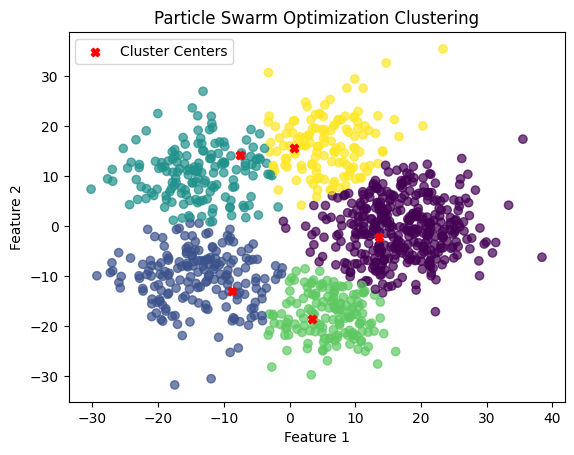

In [11]:
from pyswarm import pso

# Constants
NUM_CLUSTERS = 5  # Number of clusters
POP_SIZE = 50  # Population size
GEN_COUNT = 100  # Number of generations
generation_counter = 0

def penalty (centroids_labels, NUM_CLUSTERS):
    unique_labels = np.unique(centroids_labels)
    count = np.bincount(centroids_labels)
    enforce_num_clusters = 0
    
        # Select a labels not in the current set
    if len(count) == 5:
        new_label = ([label for label in range(NUM_CLUSTERS) if count[label]<70])
        for i in range(len(new_label)):
            enforce_num_clusters = 1e4
            # Find the label with the maximum number of assigned data points
            max_label = np.argmax(np.bincount(centroids_labels))

            # Find the data points assigned to the centroid with the maximum label
            max_label_data_points = np.where(centroids_labels == max_label)[0]

            # Randomly choose a subset of data points with the maximum label
            num_to_replace = np.random.randint(40, 101)

            # Get data points which are going to be replaced
            replace_indices = np.random.choice(max_label_data_points, size=num_to_replace, replace=False)

            # Assign the new label to the selected data points
            centroids_labels[replace_indices] = new_label[i]
    else:
        # Select a labels not in the current set
        enforce_num_clusters = 1e4
        new_label = ([label for label in range(NUM_CLUSTERS) if label not in unique_labels])
        
        for i in range(len(new_label)):
            # Find the label with the maximum number of assigned data points
            max_label = np.argmax(np.bincount(centroids_labels))

            # Find the data points assigned to the centroid with the maximum label
            max_label_data_points = np.where(centroids_labels == max_label)[0]

            # Randomly choose a subset of data points with the maximum label
            num_to_replace = np.random.randint(60, 101)

            # Get data points which are going to be replaced
            replace_indices = np.random.choice(max_label_data_points, size=num_to_replace, replace=False)

            # Assign the new label to the selected data points
            centroids_labels[replace_indices] = new_label[i]
            
    return enforce_num_clusters, centroids_labels

def pso_fitness_function(position):
    enforce_num_clusters = 0
    global generation_counter
    
    centroids = position.reshape((NUM_CLUSTERS, 2))
    centroids_labels = np.argmin(pairwise_distances(data, centroids), axis=1)
    
    enforce_num_clusters, centroids_labels = penalty(centroids_labels, NUM_CLUSTERS)

    intra_cluster_distance = sum([np.mean(pairwise_distances(data[centroids_labels == i])) for i in range(NUM_CLUSTERS)])

    inter_cluster_distance = np.sum(pairwise_distances(centroids))
    
    fitness = intra_cluster_distance  + enforce_num_clusters
    
    generation_counter += 1
    if generation_counter % 100 == 0:
        print(f"Generation: {generation_counter}, Fitness: {fitness}")
    return  fitness

# PSO optimization
lb = np.tile(np.min(data, axis=0), NUM_CLUSTERS)
ub = np.tile(np.max(data, axis=0), NUM_CLUSTERS)


best_solution, _ = pso(pso_fitness_function, lb, ub, swarmsize=POP_SIZE, maxiter=GEN_COUNT)

# Extract cluster assignments from the best solution for all labels
best_centroids = best_solution.reshape((NUM_CLUSTERS, 2))
best_labels, _ = pairwise_distances_argmin_min(data, best_centroids)

print(np.unique(best_labels))
print(np.bincount(best_labels))
# Visualize the clustering results
plt.scatter(data[:, 0], data[:, 1], c=best_labels, cmap='viridis', alpha=0.7)
plt.scatter(best_centroids[:, 0], best_centroids[:, 1], c='red', marker='X', label='Cluster Centers')
plt.title('Particle Swarm Optimization Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()